<a href="https://colab.research.google.com/github/AvinashIkigai/Art-of-Doing/blob/main/Algorithmic_Trading_Strategy_Using_SMA30_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GAIL.csv to GAIL.csv


In [3]:
GAIL = pd.read_csv('GAIL.csv')
GAIL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,179.500000,182.000000,178.475006,181.074997,167.128174,4269006.0
1,2019-01-02,180.274994,180.949997,173.774994,175.149994,161.659531,7056976.0
2,2019-01-03,175.149994,176.225006,173.475006,174.975006,161.498016,4795824.0
3,2019-01-04,175.125000,176.949997,173.774994,176.574997,162.974777,3675758.0
4,2019-01-07,176.750000,179.024994,175.550003,178.550003,164.797653,3408486.0
...,...,...,...,...,...,...,...
460,2020-11-12,93.750000,94.000000,92.599998,93.050003,93.050003,13703238.0
461,2020-11-13,92.949997,93.300003,91.500000,92.800003,92.800003,10482732.0
462,2020-11-17,94.300003,95.300003,93.050003,93.550003,93.550003,12227481.0
463,2020-11-18,93.699997,94.650002,92.800003,93.949997,93.949997,10207427.0


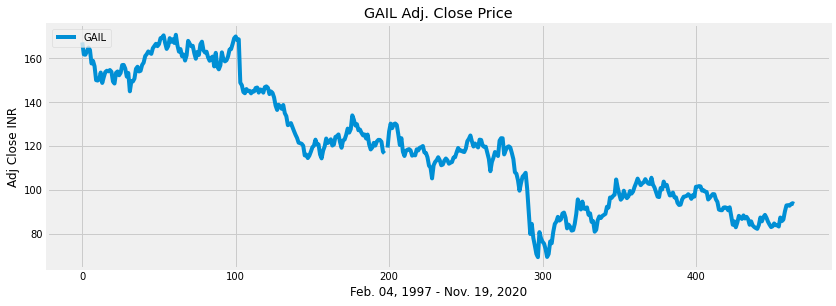

In [4]:
plt.figure(figsize=(12.5,4.5))
plt.plot(GAIL['Adj Close'],label='GAIL')
plt.title('GAIL Adj. Close Price')
plt.xlabel('Feb. 04, 1997 - Nov. 19, 2020')
plt.ylabel('Adj Close INR')
plt.legend(loc='upper left')
plt.show()

In [5]:
SMA30 = pd.DataFrame()
SMA30['Adj Close' ] = GAIL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
460,86.020000
461,86.166666
462,86.385000
463,86.591666


In [6]:
SMA100 = pd.DataFrame()
SMA100['Adj Close' ] = GAIL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
460,93.6630
461,93.5600
462,93.4440
463,93.3475


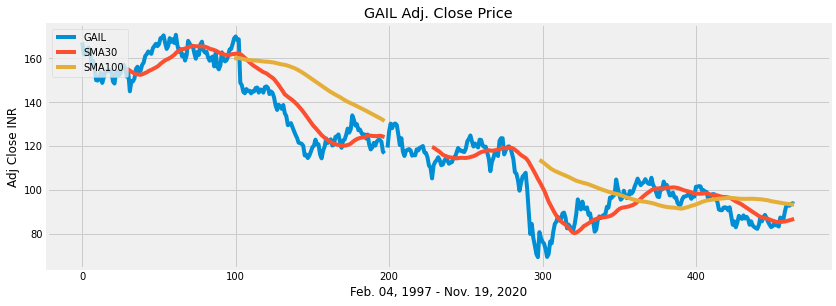

In [7]:
plt.figure(figsize=(12.5,4.5))
plt.plot(GAIL['Adj Close'],label='GAIL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('GAIL Adj. Close Price')
plt.xlabel('Feb. 04, 1997 - Nov. 19, 2020')
plt.ylabel('Adj Close INR')
plt.legend(loc='upper left')
plt.show()

In [8]:
data = pd.DataFrame()
data['GAIL'] = GAIL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,GAIL,SMA30,SMA100
0,167.128174,NaN,NaN
1,161.659531,NaN,NaN
2,161.498016,NaN,NaN
3,162.974777,NaN,NaN
4,164.797653,NaN,NaN
...,...,...,...
460,93.050003,86.020000,93.6630
461,92.800003,86.166666,93.5600
462,93.550003,86.385000,93.4440
463,93.949997,86.591666,93.3475


In [9]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['GAIL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag !=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['GAIL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [10]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [11]:
data

,GAIL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,167.128174,NaN,NaN,NaN,NaN
1,161.659531,NaN,NaN,NaN,NaN
2,161.498016,NaN,NaN,NaN,NaN
3,162.974777,NaN,NaN,NaN,NaN
4,164.797653,NaN,NaN,NaN,NaN
...,...,...,...,...,...
460,93.050003,86.020000,93.6630,NaN,NaN
461,92.800003,86.166666,93.5600,NaN,NaN
462,93.550003,86.385000,93.4440,NaN,NaN
463,93.949997,86.591666,93.3475,NaN,NaN


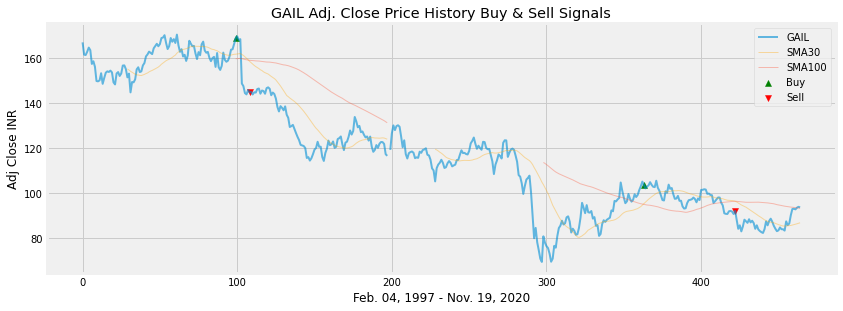

In [15]:
plt.figure(figsize=(12.6,4.6))
plt.plot(data['GAIL'],label='GAIL', alpha=0.60 ,linewidth=2)
plt.plot(data['SMA30'], label = 'SMA30', alpha=0.35,linewidth=1,color='orange')
plt.plot(data['SMA100'], label = 'SMA100', alpha=0.35,linewidth=1)
plt.scatter(data.index, data['Buy_Signal_Price'],label = 'Buy', marker= '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'],label = 'Sell', marker= 'v', color = 'red')
plt.title('GAIL Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Feb. 04, 1997 - Nov. 19, 2020')
plt.ylabel('Adj Close INR')
plt.legend(loc='upper right')
plt.show()